<a href="https://colab.research.google.com/github/vixerica0726/Curso-Udemy-Python/blob/main/desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Extração: carregar os dados do GitHub

In [12]:
import pandas as pd

# URL do arquivo JSON no GitHub (exemplo, substitua pela URL correta)
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json"

# Carregar os dados em um DataFrame
df = pd.read_json(url)

# Mostrar as primeiras linhas para entender os dados
print(df.head())

import pandas as pd

url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json"
df = pd.read_json(url)

print(df.columns)


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

2. Transformação: limpeza e ajuste dos dados

In [13]:
# Ver as primeiras linhas das colunas que têm dados aninhados
print(df['customer'].head())
print(df['phone'].head())
print(df['internet'].head())
print(df['account'].head())




0    {'gender': 'Female', 'SeniorCitizen': 0, 'Part...
1    {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...
2    {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...
3    {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...
4    {'gender': 'Female', 'SeniorCitizen': 1, 'Part...
Name: customer, dtype: object
0     {'PhoneService': 'Yes', 'MultipleLines': 'No'}
1    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}
2     {'PhoneService': 'Yes', 'MultipleLines': 'No'}
3     {'PhoneService': 'Yes', 'MultipleLines': 'No'}
4     {'PhoneService': 'Yes', 'MultipleLines': 'No'}
Name: phone, dtype: object
0    {'InternetService': 'DSL', 'OnlineSecurity': '...
1    {'InternetService': 'DSL', 'OnlineSecurity': '...
2    {'InternetService': 'Fiber optic', 'OnlineSecu...
3    {'InternetService': 'Fiber optic', 'OnlineSecu...
4    {'InternetService': 'Fiber optic', 'OnlineSecu...
Name: internet, dtype: object
0    {'Contract': 'One year', 'PaperlessBilling': '...
1    {'Contract': 'Month-to-month', 'Paperl

In [14]:
# "Desempacotar" os dados de cada coluna aninhada
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Concatenar tudo com as colunas que já existem no df principal (customerID, Churn)
df_full = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

print(df_full.columns)  # agora você deve ver todas as colunas detalhadas
print(df_full.head())


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes           

In [15]:
print(df_full.columns)  # veja exatamente o nome da coluna, pode ser 'Charges.Monthly' ou outro nome parecido


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')


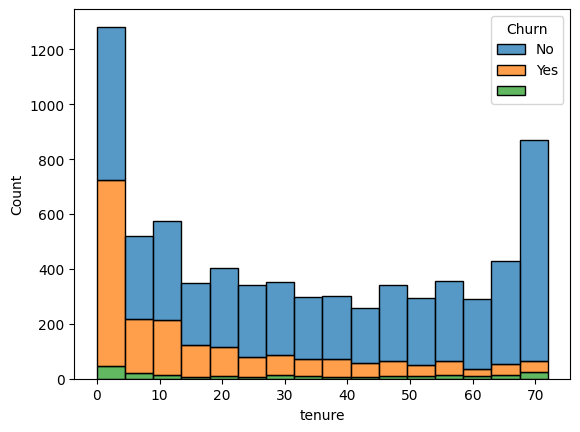

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemplo: análise simples do churn com base em tenure
sns.histplot(data=df_full, x='tenure', hue='Churn', multiple='stack')
plt.show()


3. Carga e Análise: estatísticas básicas e visualizações

In [17]:
import pandas as pd

# Supondo que seu DataFrame se chame df, com colunas: customerID, Churn, customer, phone, internet, account

# Normaliza as colunas que são dicionários
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Junta tudo em um DataFrame só
df_full = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

# Agora você pode conferir as colunas e acessar normalmente
print(df_full.columns)


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')


       SeniorCitizen       tenure  Charges.Monthly
count    7267.000000  7267.000000      7267.000000
mean        0.162653    32.346498        64.720098
std         0.369074    24.571773        30.129572
min         0.000000     0.000000        18.250000
25%         0.000000     9.000000        35.425000
50%         0.000000    29.000000        70.300000
75%         0.000000    55.000000        89.875000
max         1.000000    72.000000       118.750000
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


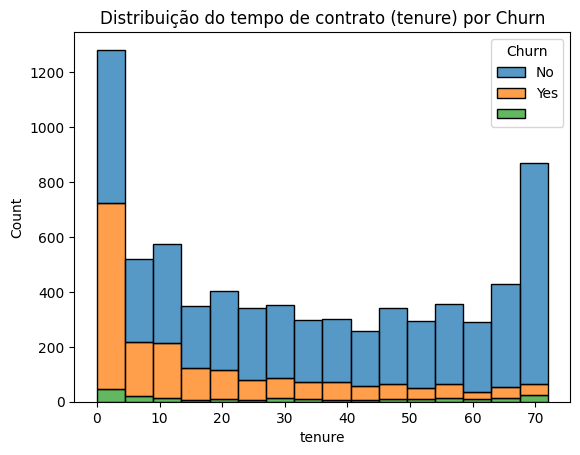

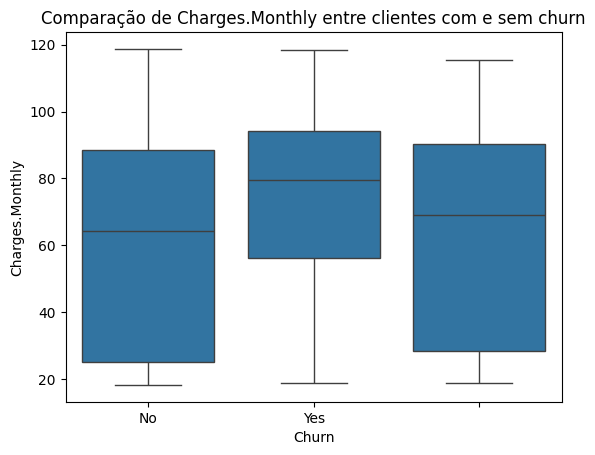

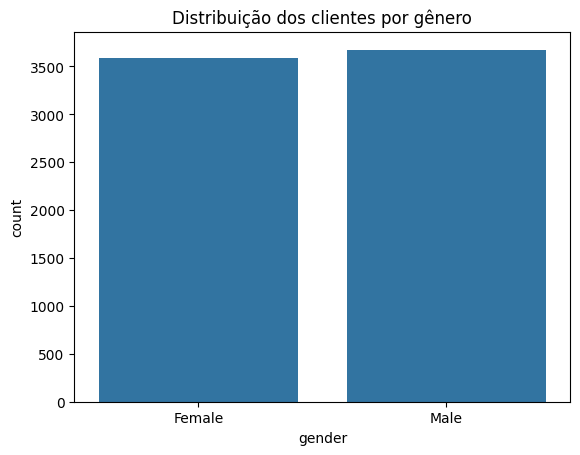

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estatísticas básicas
print(df_full.describe())

# Contagem de churn
print(df_full['Churn'].value_counts())

# Visualização 1: tempo de contrato (tenure)
sns.histplot(data=df_full, x='tenure', hue='Churn', multiple='stack')
plt.title('Distribuição do tempo de contrato (tenure) por Churn')
plt.show()

# Visualização 2: Charges.Monthly
sns.boxplot(x='Churn', y='Charges.Monthly', data=df_full)
plt.title('Comparação de Charges.Monthly entre clientes com e sem churn')
plt.show()

# Visualização 3: Gênero
sns.countplot(x='gender', data=df_full)
plt.title('Distribuição dos clientes por gênero')
plt.show()


print(df_full.head())


# Resumo da Análise Telecom X

- Foram analisados dados de clientes de uma empresa de telecomunicações para entender o perfil dos clientes que cancelaram o serviço (Churn).
- O tempo de contrato (`tenure`) é menor para clientes que cancelaram, indicando que clientes com menos tempo tendem a sair mais.
- Os valores mensais cobrados (`Charges.Monthly`) são geralmente mais baixos para clientes que saíram, mas existe uma variação grande.
- A distribuição por gênero mostrou uma divisão equilibrada entre homens e mulheres.
- Esses insights podem ajudar a empresa a focar em retenção de clientes com menor tempo de contrato e ajustar ofertas para segmentos específicos.

---
